In [5]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from PIL import Image
from shutil import copyfile

ModuleNotFoundError: No module named 'scikitlearn'

In [7]:
directory = '/Volumes/OGA16_ESP/East_Shetland_Platform/01. RAW PSTM STACKS/10. FULL STACKS'
# directory = '/Users/Mikey/Documents/Workspace/segy'

In [4]:
for file in os.walk(directory):
    for filename in file[2]:
        segypath = directory + '/' + filename
        imagepath = os.path.splitext(segypath)[0] + ".png"
        with segyio.open(segypath) as segyfile:
            print(segypath)
            print(imagepath)
            traces = len(segyfile.trace)
            samples = 1001
            
            data = np.zeros([traces, samples])

            i = 0
            for trace in segyfile.trace:
                data[i,:] = np.asarray(trace[0:1001] * 1.0)
                i += 1

            data = data.T
            Image.fromarray(data).convert('I').save(imagepath,"PNG")

/Volumes/OGA16_ESP/East_Shetland_Platform/01. RAW PSTM STACKS/10. FULL STACKS/ESP2D_RAW_FULL_KPSTM_STACK_008A094.segy
/Volumes/OGA16_ESP/East_Shetland_Platform/01. RAW PSTM STACKS/10. FULL STACKS/ESP2D_RAW_FULL_KPSTM_STACK_008A094.png
/Volumes/OGA16_ESP/East_Shetland_Platform/01. RAW PSTM STACKS/10. FULL STACKS/ESP2D_RAW_FULL_KPSTM_STACK_009A095.segy
/Volumes/OGA16_ESP/East_Shetland_Platform/01. RAW PSTM STACKS/10. FULL STACKS/ESP2D_RAW_FULL_KPSTM_STACK_009A095.png


KeyboardInterrupt: 

In [9]:
filename = '/Volumes/OGA16_ESP/East_Shetland_Platform/01. RAW PSTM STACKS/10. FULL STACKS/ESP2D_RAW_FULL_KPSTM_STACK_035A056.segy'

segyfile = segyio.open(filename, "r");
ilines = len(segyfile._ilines)
samples = len(segyfile._samples)

traces = len(segyfile.trace)
samples = 1001
# samples = len(segyfile._samples)

data = np.zeros([traces, samples])

i = 0
for trace in segyfile.trace:
    nparray = np.asarray(trace[0:1001] * 1.0)
    nparray = np.clip(nparray, -2500, 2500)
    nparray = (nparray-np.min(nparray))/(np.max(nparray)-np.min(nparray))
    print (nparray)
    data[i,:] = nparray
    i += 1
    
data = data.T
Image.fromarray(data).convert('I').show()

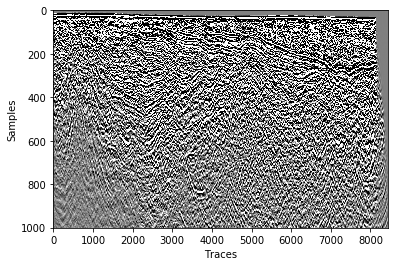

In [61]:
plt.xlabel('Traces')
plt.ylabel('Samples')
plt.imshow(data, vmin = np.min(data)/10, vmax = np.max(data)/10, aspect='auto', cmap='gray')

In [50]:
# plt.savefig('/Users/Mikey/Documents/Workspace/segy/ESP2D_RAW_FULL_KPSTM_STACK_008A094.png', dpi=100)

In [65]:
from PIL import Image
im = Image.fromarray(data)

In [66]:
im.show()